# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Dataset Loading

In [2]:
df=pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv',delimiter = '\t', quoting = 3)

In [3]:
df.shape

(900, 2)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Preprocesing

In [5]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vatsalnanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus=[]

for i in range(0, 900):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    

In [10]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Data Transformation

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [19]:
X=cv.fit_transform(corpus).toarray()
Y=df.iloc[:,-1].values

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# # ML model-Linear SVM

In [21]:
LSC = LinearSVC()

In [22]:
LSC.fit(X_train, Y_train)
x11=LSC.score(X_train, Y_train)
x12=LSC.score(X_test, Y_test)

#  ML model-Gaussian Naive Bayes

In [23]:
gnb = GaussianNB()

In [24]:
gnb.fit(X_train, Y_train)
x21=gnb.score(X_train, Y_train) 
x22=gnb.score(X_test, Y_test)

# ML model-Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, Y_train)
x31=lr.score(X_train, Y_train) 
x32=lr.score(X_test, Y_test)

# ML model-Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)

In [28]:
rfc.fit(X_train, Y_train)
x41=rfc.score(X_train, Y_train) 
x42=rfc.score(X_test, Y_test)

# Plotting the data

In [29]:
data1 = {'SVM':x11, 'Gaussian Naive Bayes':x21, 'Logistic Regression':x31,'Random Forest Classifier':x41}

In [30]:
algos = list(data1.keys())
train_accuracy = list(data1.values())

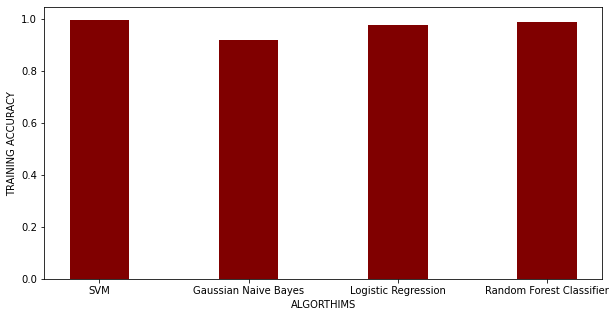

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, train_accuracy, color ='maroon',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TRAINING ACCURACY")
plt.show()

In [32]:
data2 = {'SVM':x12, 'Gaussian Naive Bayes':x22, 'Logistic Regression':x32,'Random Forest Classifier':x42}

In [33]:
algos = list(data2.keys())
test_accuracy = list(data2.values())

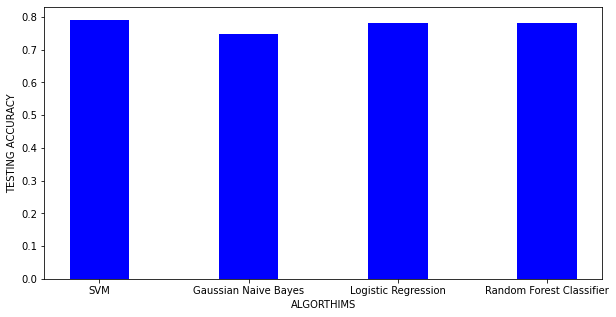

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, test_accuracy, color ='blue',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TESTING ACCURACY")
plt.show()